In [1]:
#The project uses publicly available data from LendingClub.com
#LendingClub connects borrowers with potential investors
#In this project, a model is built using DecisionTree classifier and also RandomForest Classifier
#that would help investors predict whether or not the borrower would pay back the loan in full


#Here are what the columns in the dataset represent:

#credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
#purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
#int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
#installment: The monthly installments owed by the borrower if the loan is funded.
#log.annual.inc: The natural log of the self-reported annual income of the borrower.
#dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
#fico: The FICO credit score of the borrower.
#days.with.cr.line: The number of days the borrower has had a credit line.
#revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
#revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
#inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
#delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
#pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading the data
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


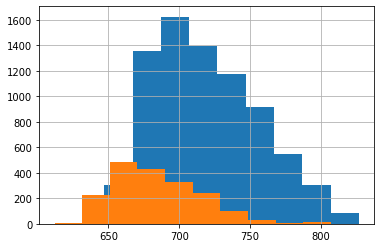

In [10]:
#EXPLORATORY DATA ANALYSIS

#Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
loans[loans['credit.policy']==1]['fico'].hist()
loans[loans['credit.policy']==0]['fico'].hist()

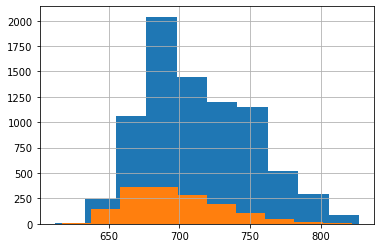

In [11]:
loans[loans['not.fully.paid']==0]['fico'].hist()
loans[loans['not.fully.paid']==1]['fico'].hist()

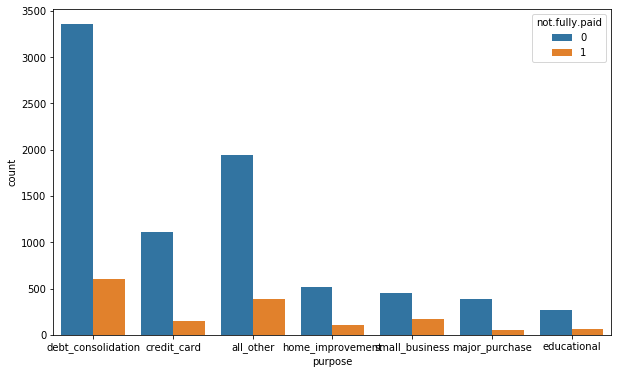

In [12]:
#Countplot showing the purpose of loans using data from 'not.fully.paid' column
plt.figure(figsize=(10,6))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])

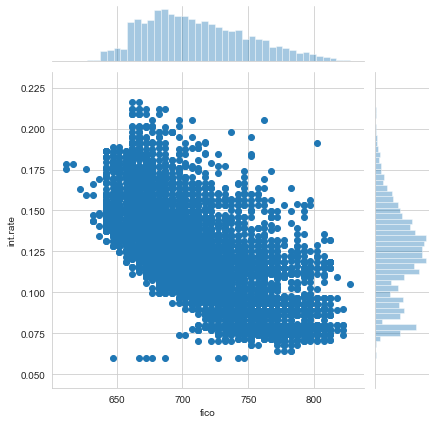

In [13]:
#Analyzing the trend between FICO score and interest rate
sns.set_style('whitegrid')
sns.jointplot(x=loans['fico'],y=loans['int.rate'])

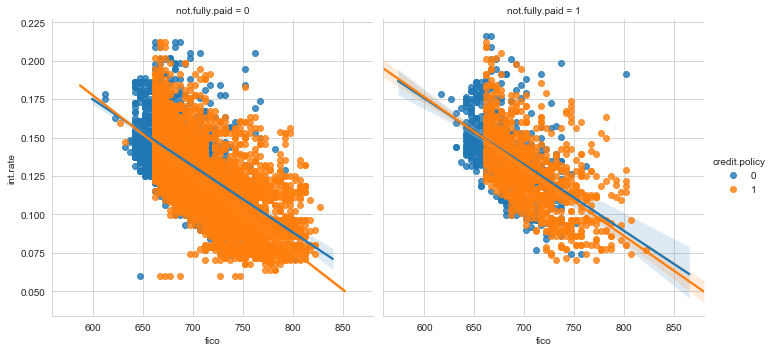

In [14]:
#Using lmplot to figure out if trend differed between not.fully.paid and credit.policy
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid')

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [16]:
#It can be seen that the purpose column in the datset is categorical 
#For the machine learning algorithm to understand them, it is essential to transform them using dummy variables

categorical_feat = pd.get_dummies(loans['purpose'],drop_first=True)
categorical_feat

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [17]:
new_loans = pd.concat([loans,categorical_feat],axis=1)

In [18]:
new_loans.drop('purpose',axis=1,inplace=True)
new_loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [19]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X=new_loans.drop('not.fully.paid',axis=1)
y=new_loans['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
#Training a DecsionTree model

from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
predictions = dtree.predict(X_test)

In [24]:
#Evaluating the decision tree model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1994  437]
 [ 341  102]]


In [25]:
#Training a RandomForest model
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(X_train,y_train)

C:\Users\ranad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
predictions_1 = rfc.predict(X_test)

In [30]:
#Evaluating RandomForest model
print(classification_report(y_test,predictions_1))
print('\n')
print(confusion_matrix(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.39      0.05      0.08       443

    accuracy                           0.84      2874
   macro avg       0.62      0.52      0.50      2874
weighted avg       0.78      0.84      0.79      2874



[[2398   33]
 [ 422   21]]
